# CASE STUDY - LEAD SCORING

### Problem statement:

X Education, an online education company catering to industry professionals, faces a challenge in optimizing its lead conversion process. Despite attracting a substantial number of leads through various channels such as website visits, form submissions, and referrals, the company's current lead conversion rate is only 30%. Recognizing the need for improvement, X Education aims to enhance its efficiency by identifying and prioritizing the most promising leads, referred to as 'Hot Leads,' with the expectation of achieving a target lead conversion rate of 80%.

The current lead acquisition process involves potential customers landing on the website through marketing efforts on platforms like Google. Leads are generated when individuals express interest by browsing courses, filling out forms, or engaging with content. These leads, obtained both online and through referrals, are then pursued by the sales team through calls and emails. However, the majority of leads do not convert into paying customers.

To address this issue, X Education seeks to implement a lead scoring model that assigns a score to each lead based on their likelihood to convert. The objective is to prioritize leads with higher scores, enabling the sales team to focus on those more likely to become paying customers. The CEO has set a target lead conversion rate of 80%, emphasizing the need for the model to significantly improve the current conversion rates. The middle stage of the process involves nurturing potential leads by educating them about the product and maintaining consistent communication to increase the overall lead conversion.

In summary, the task at hand is to develop a predictive model that assigns lead scores to identify the most promising leads, ultimately improving the lead conversion rate and aligning with the CEO's target of 80%. This model should enhance the efficiency of the lead conversion process by allowing the sales team to concentrate efforts on leads with higher conversion potential, contributing to the overall success of X Education's business objectives.

In [41]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

#Importing Pandas , NumPy and other  required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### STEP - 1  : LOADING THE DATA

In [42]:
lead_df = pd.read_csv('Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [43]:
# Checking the dimensions of the dataframe
lead_df.shape

(9240, 37)

In [44]:
# checking the statistical aspects of the dataframe
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [45]:
# Checking for each column type and if there are any nulls
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 2 : Data Preparation

In [46]:
# Converting all the values to lower case

lead_df = lead_df.applymap(lambda s:s.lower() if type(s) == str else s)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,select,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,select,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


In [47]:
#### Converting some binary variables (Yes/No) to 0/1

In [48]:
# Define the binary_map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Get the list of all columns in the DataFrame
all_columns = lead_df.columns

# Iterate over each column and check if it contains only 'yes' and 'no'
for column in all_columns:
    unique_values = set(lead_df[column].unique())
    if unique_values == {'yes', 'no'}:
        # Apply the binary_map function to the column
        lead_df[column] = binary_map(lead_df[column])
        print(f"Mapping 'Yes' and 'No' to 1 and 0 in the column '{column}'.")
    else:
        print(f"The column '{column}' does not contain only 'Yes' and 'No' categories.")

The column 'Prospect ID' does not contain only 'Yes' and 'No' categories.
The column 'Lead Number' does not contain only 'Yes' and 'No' categories.
The column 'Lead Origin' does not contain only 'Yes' and 'No' categories.
The column 'Lead Source' does not contain only 'Yes' and 'No' categories.
Mapping 'Yes' and 'No' to 1 and 0 in the column 'Do Not Email'.
Mapping 'Yes' and 'No' to 1 and 0 in the column 'Do Not Call'.
The column 'Converted' does not contain only 'Yes' and 'No' categories.
The column 'TotalVisits' does not contain only 'Yes' and 'No' categories.
The column 'Total Time Spent on Website' does not contain only 'Yes' and 'No' categories.
The column 'Page Views Per Visit' does not contain only 'Yes' and 'No' categories.
The column 'Last Activity' does not contain only 'Yes' and 'No' categories.
The column 'Country' does not contain only 'Yes' and 'No' categories.
The column 'Specialization' does not contain only 'Yes' and 'No' categories.
The column 'How did you hear about 

In [49]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,0,0,0,0.0,0,0.0,...,no,select,select,02.medium,02.medium,15.0,15.0,no,0,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,0,0,0,5.0,674,2.5,...,no,select,select,02.medium,02.medium,15.0,15.0,no,0,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,0,0,1,2.0,1532,2.0,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,1,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,0,0,0,1.0,305,1.0,...,no,select,mumbai,02.medium,01.high,13.0,17.0,no,0,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,0,0,1,2.0,1428,1.0,...,no,select,mumbai,02.medium,01.high,15.0,18.0,no,0,modified


In [50]:
# Iterate over each column and check if it contains only one unique value
for column in all_columns:
    unique_values = lead_df[column].unique()
    if len(unique_values) == 1:
        # Drop the column if it contains only one unique value
        lead_df.drop(column,axis=1,inplace=True)
        print(f"The column '{column}' has been dropped as it contains only one unique value.")

The column 'Magazine' has been dropped as it contains only one unique value.
The column 'Receive More Updates About Our Courses' has been dropped as it contains only one unique value.
The column 'Update me on Supply Chain Content' has been dropped as it contains only one unique value.
The column 'Get updates on DM Content' has been dropped as it contains only one unique value.
The column 'I agree to pay the amount through cheque' has been dropped as it contains only one unique value.


In [51]:
lead_df.shape

(9240, 32)

In [52]:
null_percentage = round(100 * (lead_df.isnull().sum() / len(lead_df.index)), 2)

In [53]:
null_percentage

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [54]:
# drop all the columns that have minimum 35% null values 
# Iterate over each column and check if it contains more than 35% null values
for column in  lead_df.columns:
    null_percentage = round(100* (lead_df[column].isnull().sum() / len(lead_df[column].index)),2)
    if null_percentage > 35:
        # Drop the column if null percentage is more than 35%
        lead_df.drop(column,axis=1,inplace=True)
        print(f"The column '{column}' has been dropped as its null percentage is more than 35%.")

The column 'Tags' has been dropped as its null percentage is more than 35%.
The column 'Lead Quality' has been dropped as its null percentage is more than 35%.
The column 'Asymmetrique Activity Index' has been dropped as its null percentage is more than 35%.
The column 'Asymmetrique Profile Index' has been dropped as its null percentage is more than 35%.
The column 'Asymmetrique Activity Score' has been dropped as its null percentage is more than 35%.
The column 'Asymmetrique Profile Score' has been dropped as its null percentage is more than 35%.


In [55]:
# Replacing 'Select' with NaN (select implies no option selected i.e NaN)

lead_df = lead_df.replace('select',np.nan)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,0,0,0,0.0,0,0.0,...,0,0,0,0,0,0,NaN,NaN,0,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,NaN,NaN,0,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,potential lead,mumbai,1,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,0,0,0,1.0,305,1.0,...,0,0,0,0,0,0,NaN,mumbai,0,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,0,0,1,2.0,1428,1.0,...,0,0,0,0,0,0,NaN,mumbai,0,modified


In [56]:
# Checking the null values 

lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums          

In [57]:
# There are a large number of null variables in 4 columns.Rremoving the rows with the null values will skew the data. 
# We are going to replace the NaN values with 'not provided'. 
# This way we'll have all the data and no need to deal with null values. These can be dropped off later if needed
lead_df['Specialization'] = lead_df['Specialization'].fillna('not provided') 
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].fillna('not provided')
lead_df['Country'] = lead_df['Country'].fillna('not provided')
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].fillna('not provided')
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [58]:
# Rechecking the percentage of missing values

round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education               78.46
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [59]:
# Dropping few of the columns that have high null values
lead_df = lead_df.drop(['How did you hear about X Education','Lead Profile','City'],axis=1)

In [60]:
# Rechecking the percentage of missing values

round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [61]:
##simplification of country of origin
lead_df["Country"].value_counts()

Country
india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switze

In [62]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

lead_df['Country'] = lead_df.apply(lambda x:slots(x['Country']), axis = 1)
lead_df['Country'].value_counts()

Country
india            6492
not provided     2461
outside india     287
Name: count, dtype: int64

In [64]:
# Rechecking the percentage of missing values

round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [76]:
# Checking the percent of loss if the null values are removed

round(100*(sum(lead_df.isnull().sum(axis=1) > 1)/lead_df.shape[0]),2)

1.48

In [77]:
lead_df2 = lead_df[lead_df.isnull().sum(axis=1) <1]

In [78]:
# checking number of rows left in percentage

round(100*(lead_df2.shape[0])/(lead_df.shape[0]),2)

98.2

In [79]:
# Rechecking the percentage of missing values

round(100*(lead_df2.isnull().sum()/len(lead_df2.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [95]:
# Removing Id values as it is unique
df_final = lead_df2.drop('Prospect ID',axis=1)
df_final.shape

(9074, 22)

In [96]:
# Removing Id values as it is unique
df_final = df_final.drop('Lead Number',axis=1)
df_final.shape

(9074, 21)

In [97]:
df_final.describe

<bound method NDFrame.describe of                   Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                         api      olark chat             0            0   
1                         api  organic search             0            0   
2     landing page submission  direct traffic             0            0   
3     landing page submission  direct traffic             0            0   
4     landing page submission          google             0            0   
...                       ...             ...           ...          ...   
9235  landing page submission  direct traffic             1            0   
9236  landing page submission  direct traffic             0            0   
9237  landing page submission  direct traffic             1            0   
9238  landing page submission          google             0            0   
9239  landing page submission  direct traffic             0            0   

      Converted  TotalVisits  Total Time Spent on Web

In [98]:
# Convert the 'Lead Origin' column to a categorical data type
df_final['Lead Origin'] = df_final['Lead Origin'].astype('category')


#### PERFORMING EDA

##### Univariate Analysis

In [99]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9074 non-null   category
 1   Lead Source                                    9074 non-null   object  
 2   Do Not Email                                   9074 non-null   int64   
 3   Do Not Call                                    9074 non-null   int64   
 4   Converted                                      9074 non-null   int64   
 5   TotalVisits                                    9074 non-null   float64 
 6   Total Time Spent on Website                    9074 non-null   int64   
 7   Page Views Per Visit                           9074 non-null   float64 
 8   Last Activity                                  9074 non-null   object  
 9   Country                                       

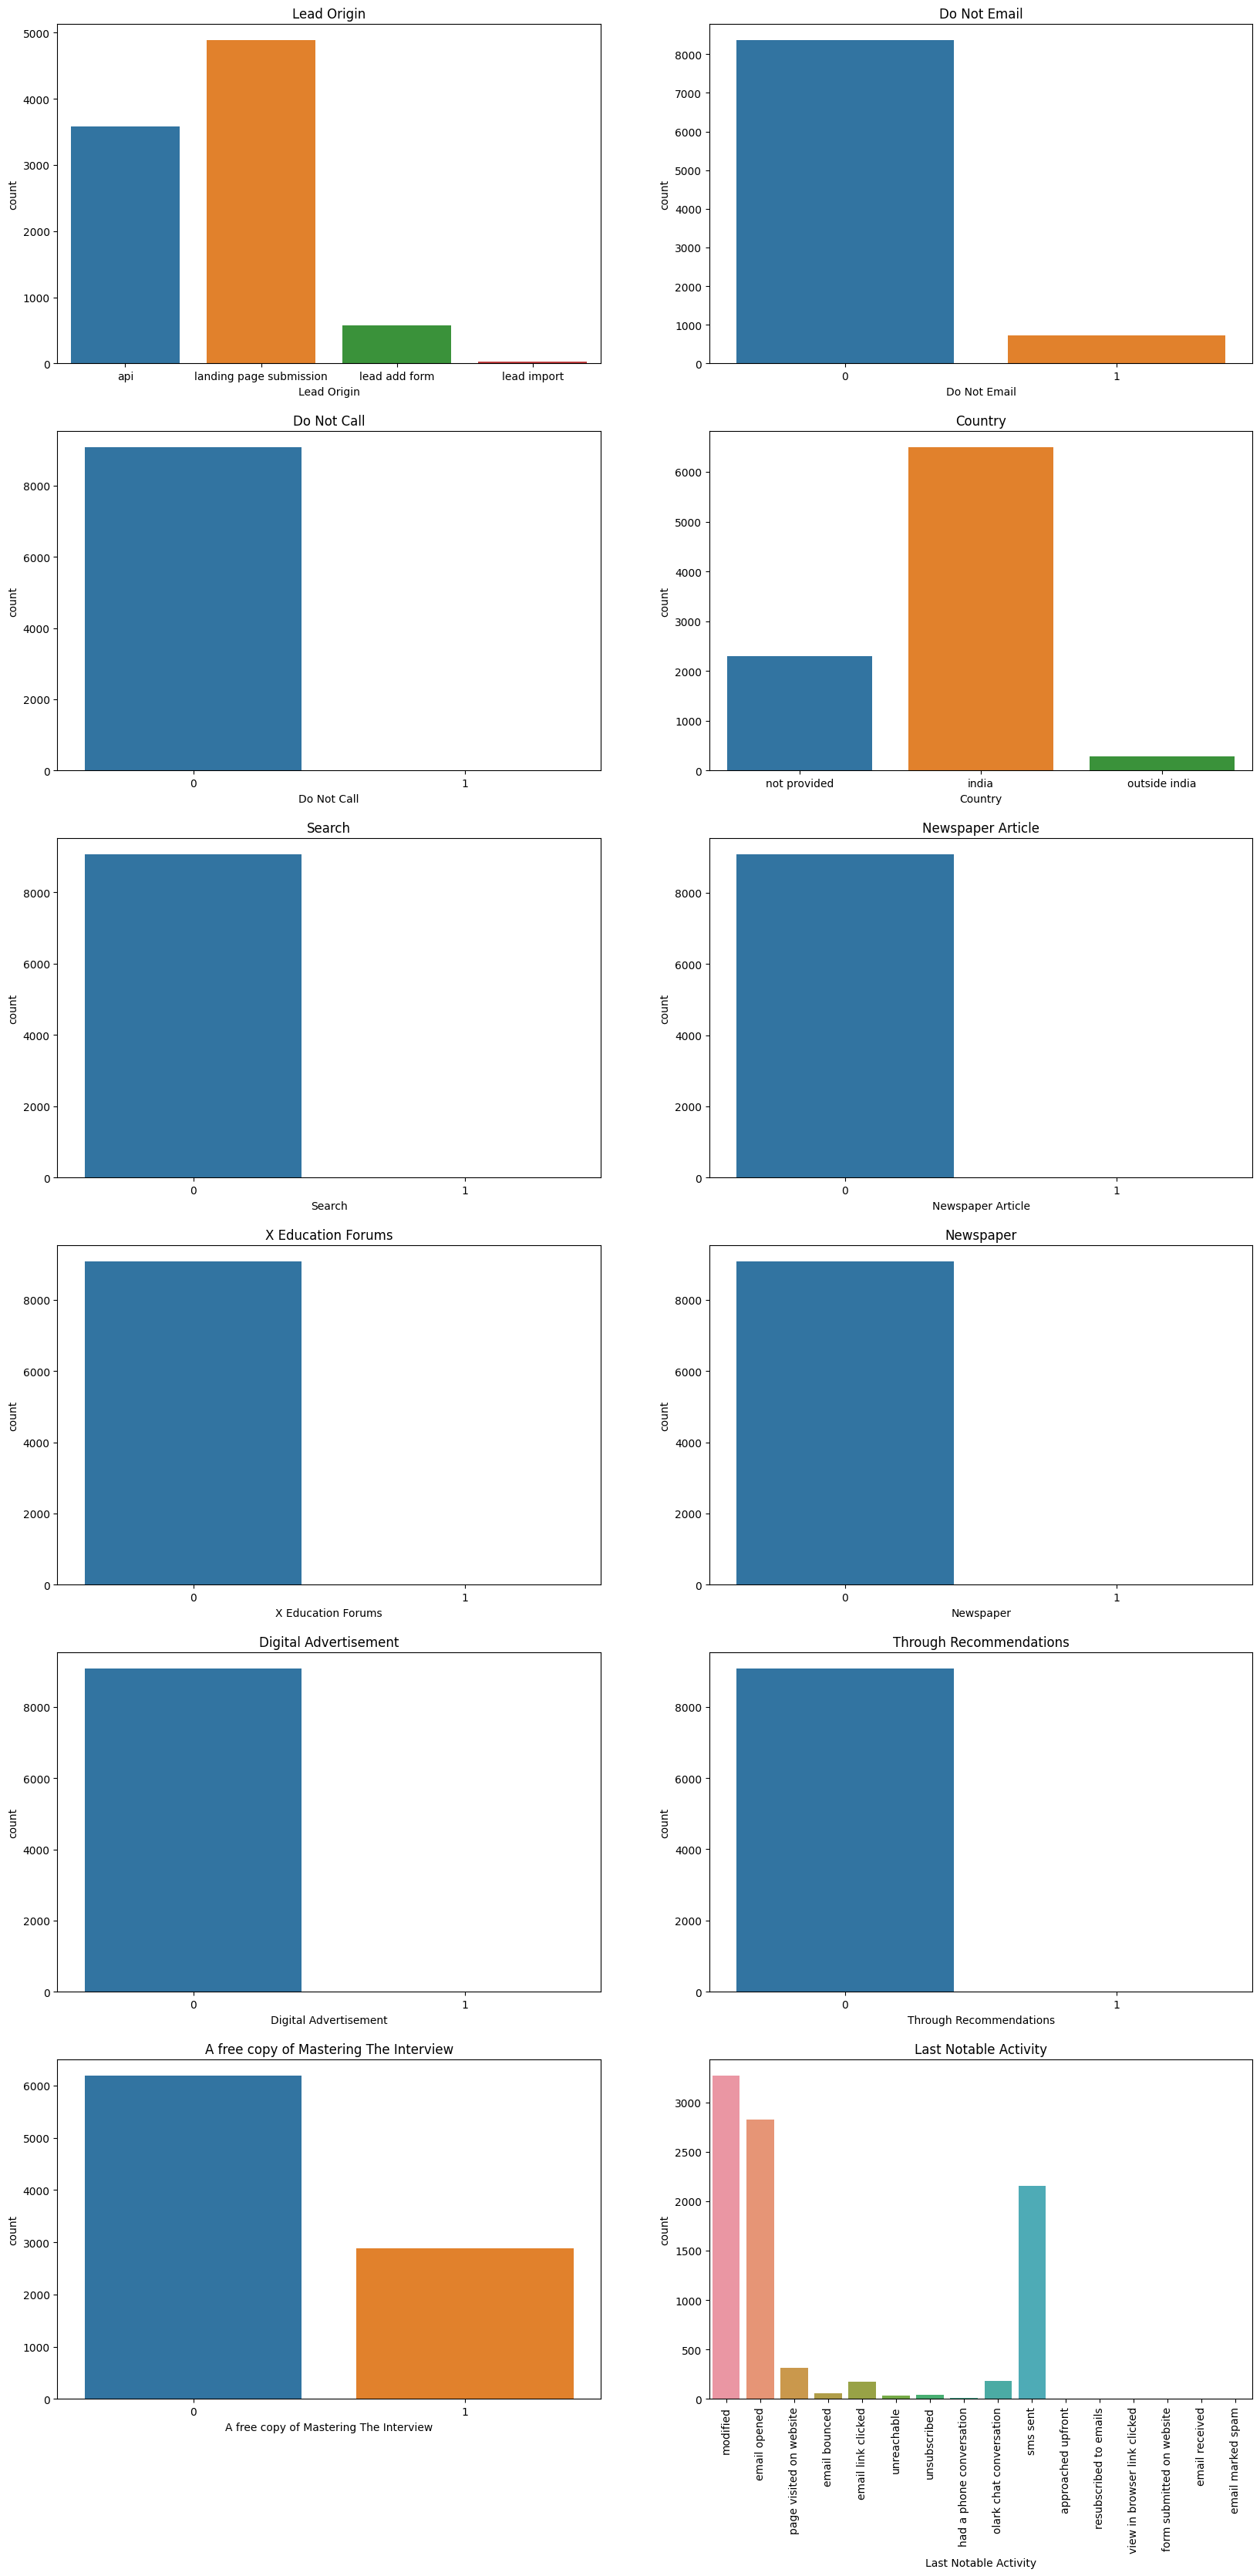

In [100]:
plt.figure(figsize = (20,40))

plt.subplot(6, 2, 1)
sns.countplot(x='Lead Origin', data=df_final)
plt.title('Lead Origin')

plt.subplot(6, 2, 2)
sns.countplot(x='Do Not Email', data=df_final)
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(x='Do Not Call', data = df_final)
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(x = 'Country', data = df_final)
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(data = df_final, x='Search')
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(data = df_final,x='Newspaper Article')
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(data = df_final, x='X Education Forums')
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(data=df_final, x='Newspaper')
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(data=df_final, x='Digital Advertisement')
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(data=df_final ,x='Through Recommendations')
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(data=df_final, x='A free copy of Mastering The Interview')
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(data = df_final, x='Last Notable Activity').tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

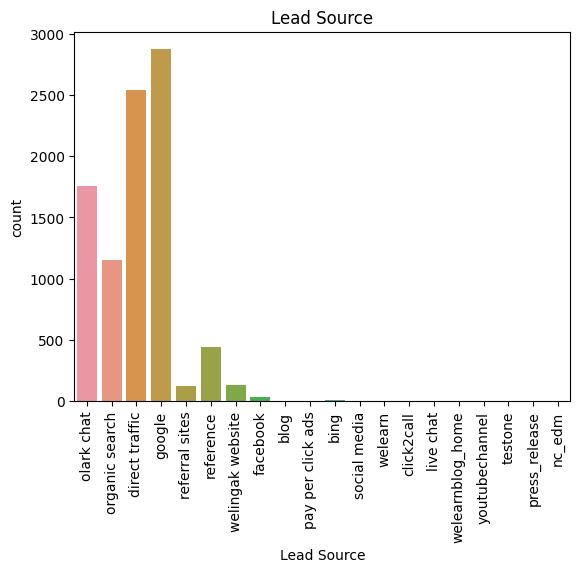

In [101]:
sns.countplot(data=df_final, x='Lead Source').tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

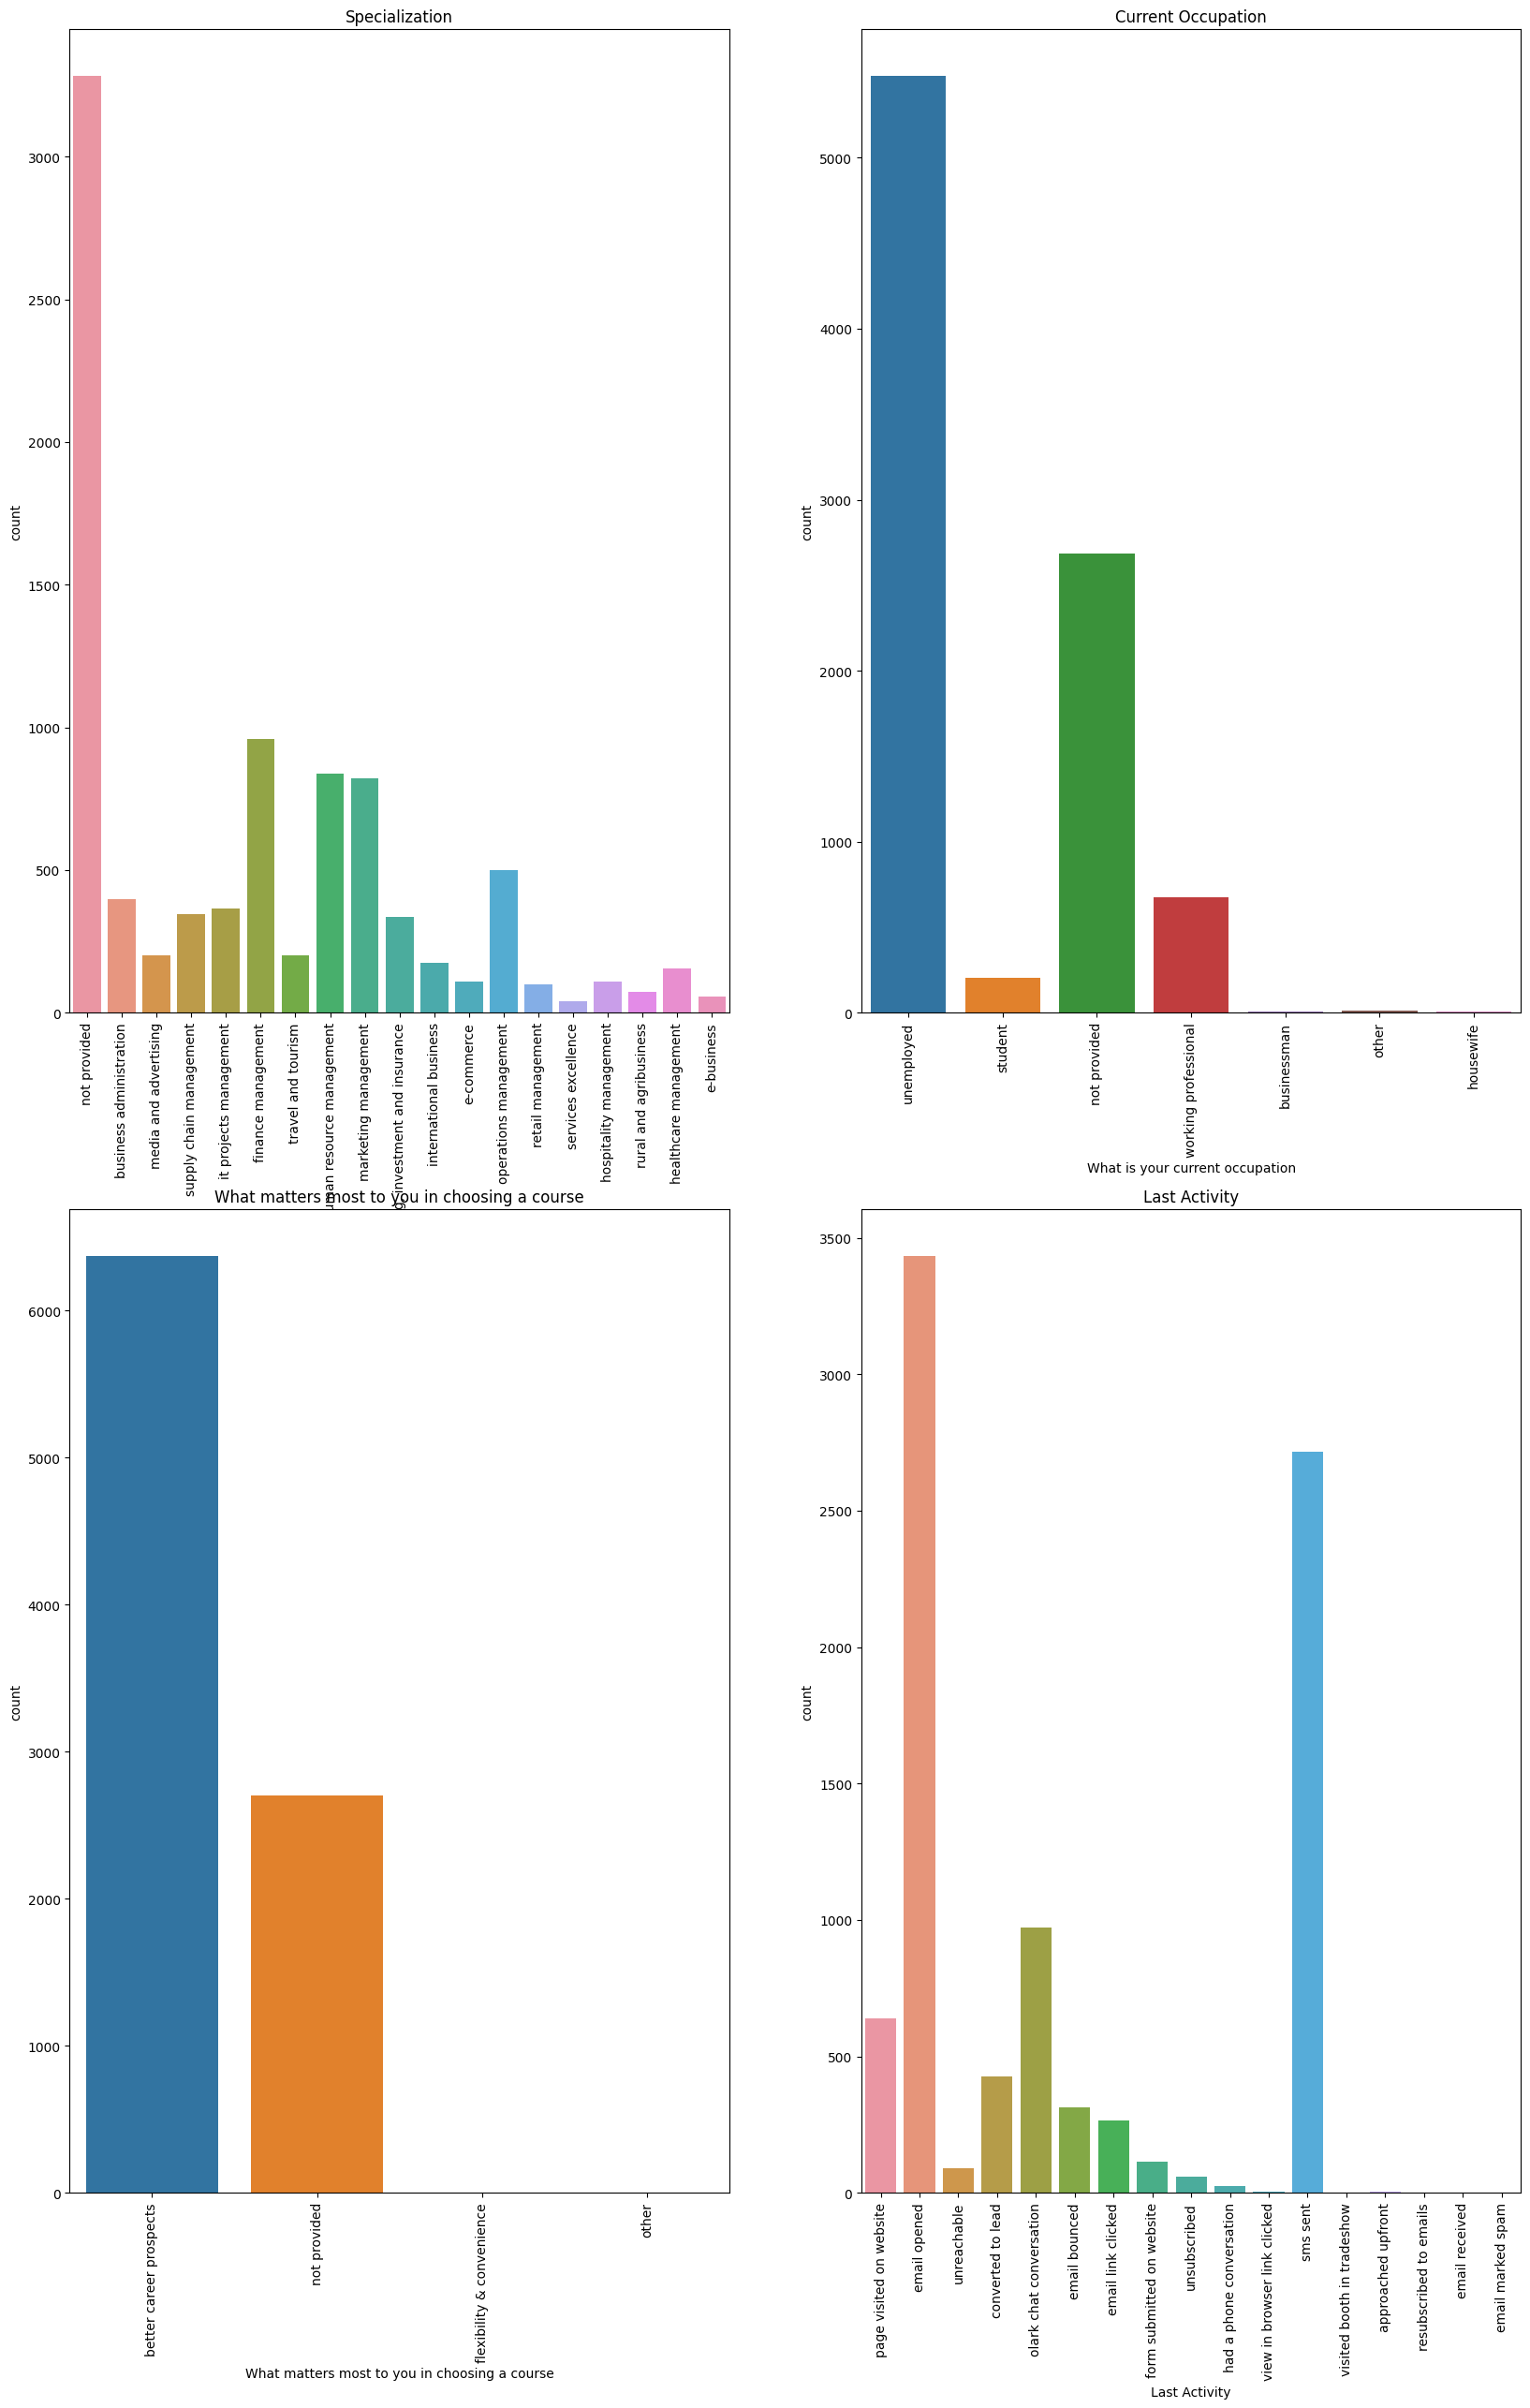

In [102]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(data=df_final, x='Specialization').tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(data=df_final, x='What is your current occupation').tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(data=df_final, x='What matters most to you in choosing a course').tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(data=df_final, x='Last Activity').tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

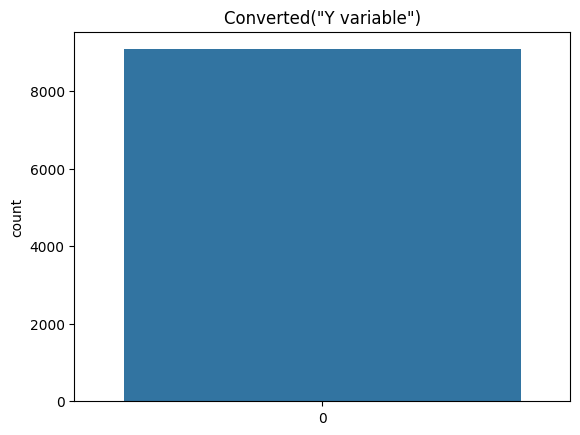

In [106]:
sns.countplot(df_final['Converted'])
plt.title('Converted("Y variable")')
plt.show()

#### DEALING WITH NUMERICAL VARIABLES

In [107]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9074 non-null   category
 1   Lead Source                                    9074 non-null   object  
 2   Do Not Email                                   9074 non-null   int64   
 3   Do Not Call                                    9074 non-null   int64   
 4   Converted                                      9074 non-null   int64   
 5   TotalVisits                                    9074 non-null   float64 
 6   Total Time Spent on Website                    9074 non-null   int64   
 7   Page Views Per Visit                           9074 non-null   float64 
 8   Last Activity                                  9074 non-null   object  
 9   Country                                       

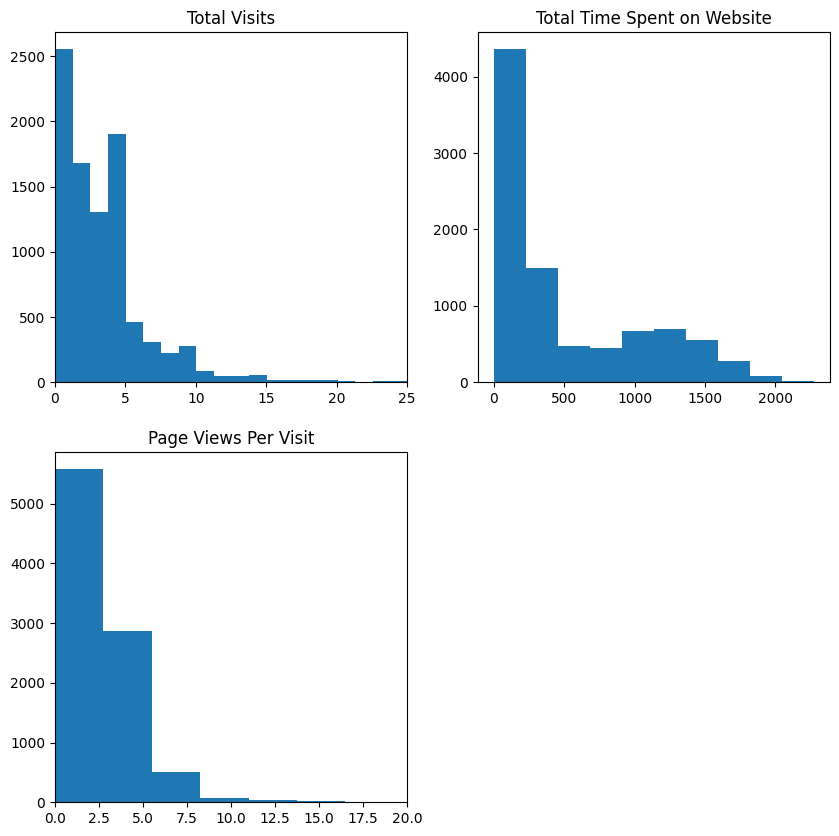

In [108]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df_final['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

#### PLOTTING ALL CATEGORICAL VARIABLES AGAINST CONVERTED

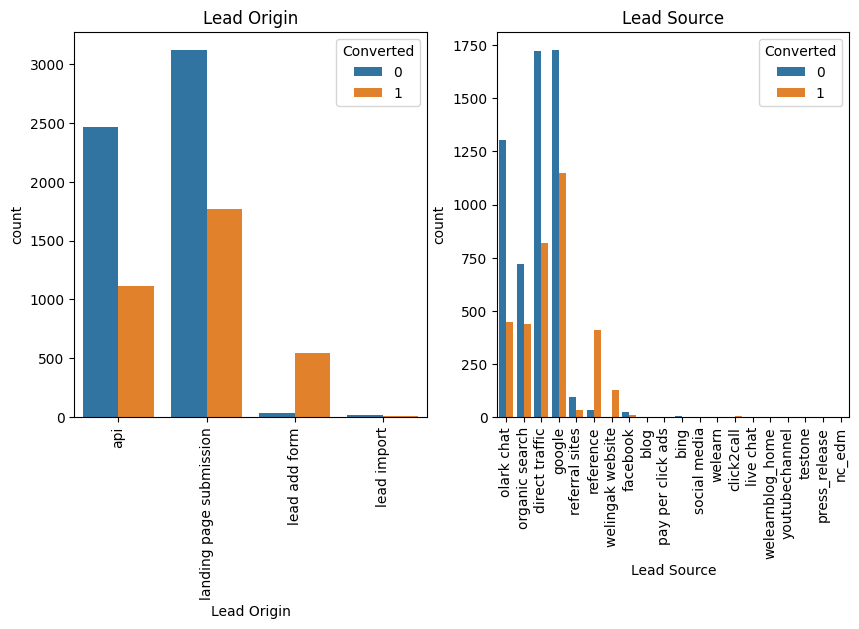

In [109]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

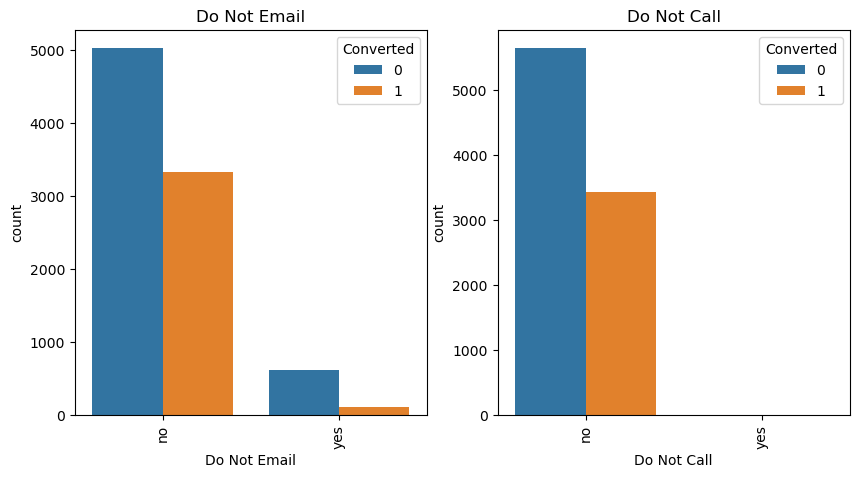

In [226]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

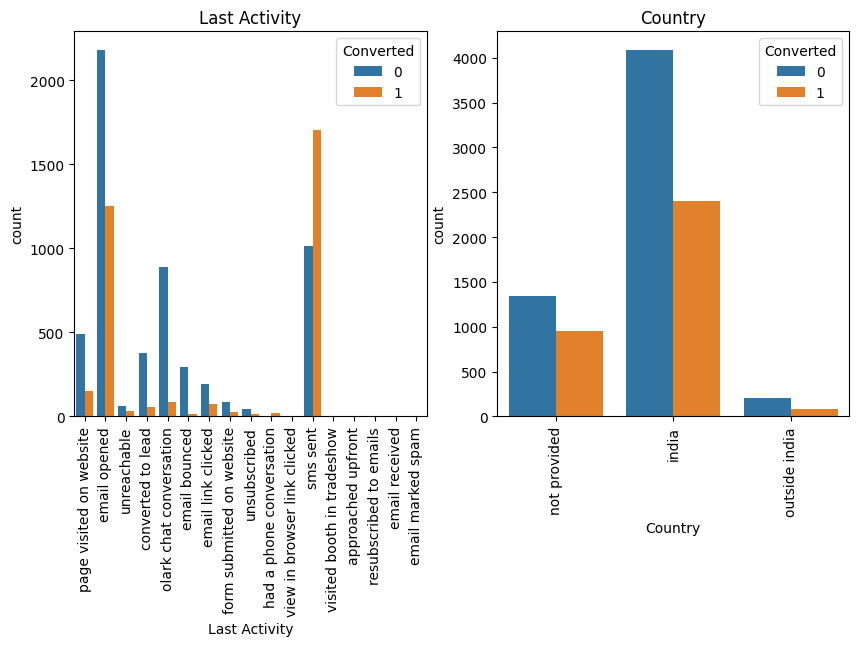

In [110]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

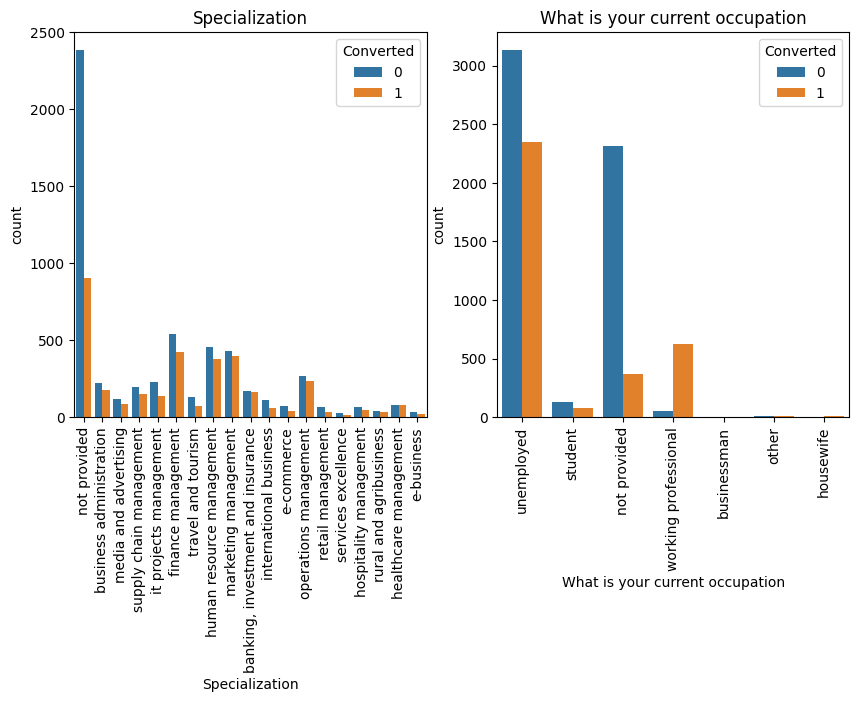

In [111]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

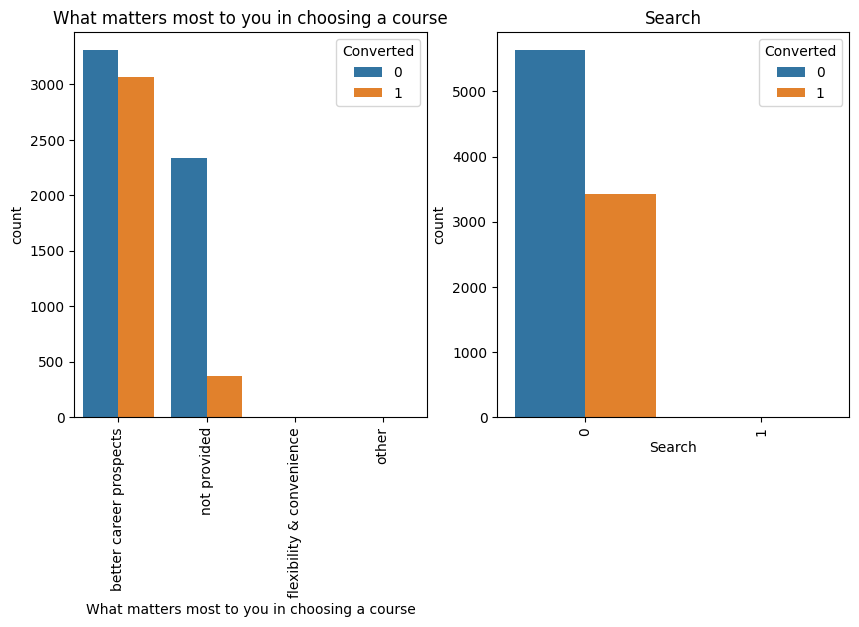

In [112]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

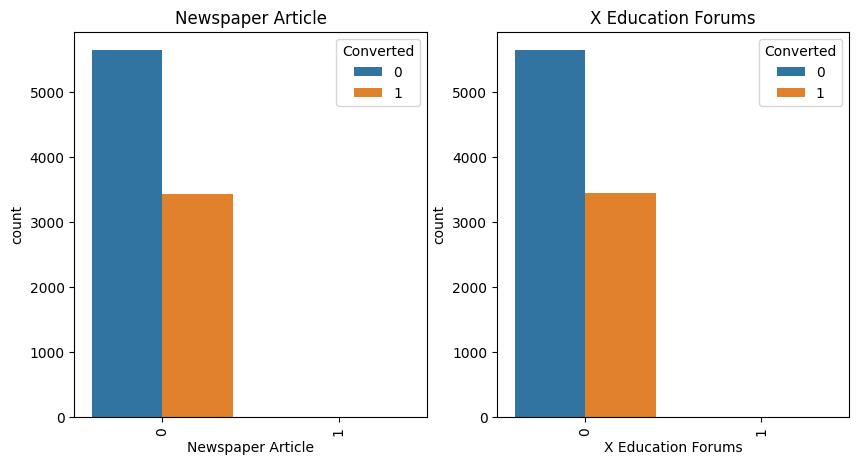

In [113]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

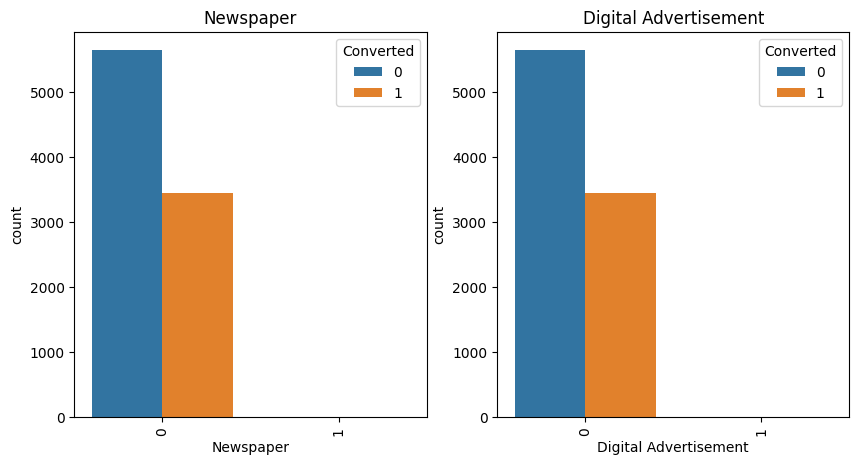

In [114]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

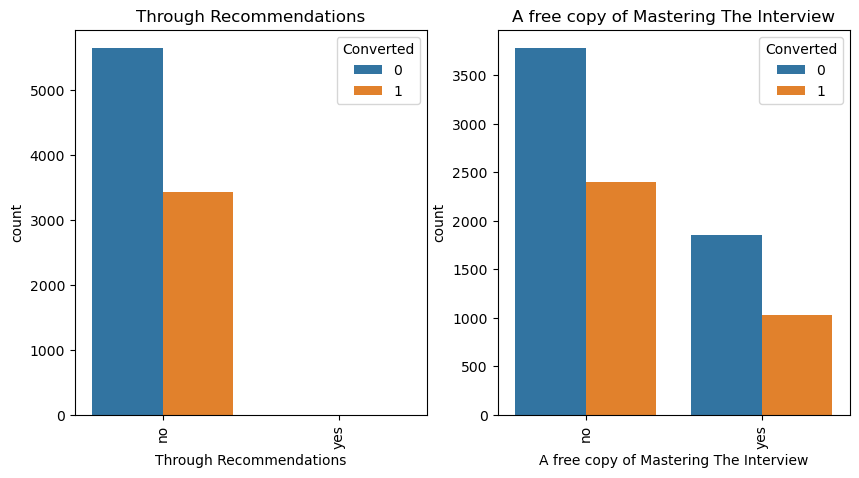

In [232]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

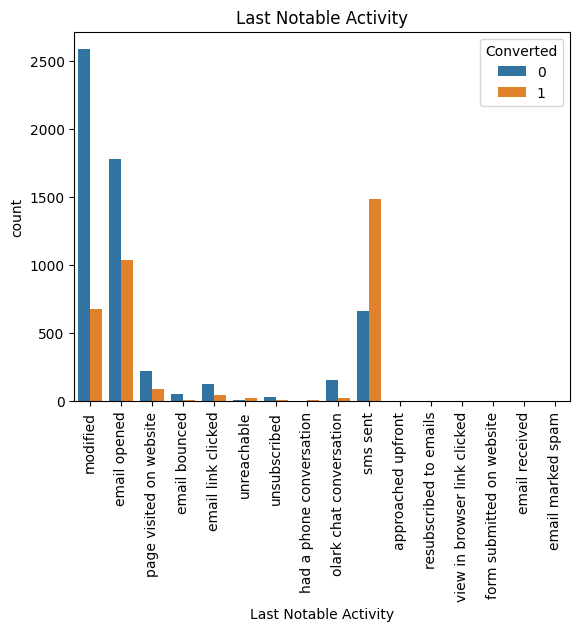

In [115]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

In [117]:
#creating buckets of all variables

numeric = df_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


In [236]:
#no major outliers observed

In [118]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9074 non-null   category
 1   Lead Source                                    9074 non-null   object  
 2   Do Not Email                                   9074 non-null   int64   
 3   Do Not Call                                    9074 non-null   int64   
 4   Converted                                      9074 non-null   int64   
 5   TotalVisits                                    9074 non-null   float64 
 6   Total Time Spent on Website                    9074 non-null   int64   
 7   Page Views Per Visit                           9074 non-null   float64 
 8   Last Activity                                  9074 non-null   object  
 9   Country                                       

In [119]:
df_final.loc[:, df_final.dtypes == 'object'].columns  ##getting the column headers

Index(['Lead Source', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'Last Notable Activity'],
      dtype='object')

In [120]:
# Create dummy variables using  'get_dummies' function


dummy = pd.get_dummies(df_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 
                                 'What is your current occupation', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_final_dum = pd.concat([df_final, dummy], axis=1)
df_final_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,0,0,0,0.0,0,0.00,page visited on website,not provided,...,False,False,True,False,False,False,False,False,False,False
1,api,organic search,0,0,0,5.0,674,2.50,email opened,india,...,False,False,False,False,False,False,False,False,False,False
2,landing page submission,direct traffic,0,0,1,2.0,1532,2.00,email opened,india,...,False,False,False,False,False,False,False,False,False,False
3,landing page submission,direct traffic,0,0,0,1.0,305,1.00,unreachable,india,...,False,False,True,False,False,False,False,False,False,False
4,landing page submission,google,0,0,1,2.0,1428,1.00,converted to lead,india,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,1,0,1,8.0,1845,2.67,email marked spam,outside india,...,False,False,False,False,False,False,False,False,False,False
9236,landing page submission,direct traffic,0,0,0,2.0,238,2.00,sms sent,india,...,False,False,False,False,False,False,True,False,False,False
9237,landing page submission,direct traffic,1,0,0,2.0,199,2.00,sms sent,india,...,False,False,False,False,False,False,True,False,False,False
9238,landing page submission,google,0,0,1,3.0,499,3.00,sms sent,india,...,False,False,False,False,False,False,True,False,False,False


In [122]:
df_final_dum = df_final_dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
                                  'Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation',
                                  'What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper',
                                  'Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview',
                                  'Last Notable Activity'], axis=1)
df_final_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0,5.0,674,2.50,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.00,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.00,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,1,2.0,1428,1.00,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9236,0,2.0,238,2.00,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9237,0,2.0,199,2.00,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
9238,1,3.0,499,3.00,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [157]:
df_final_dum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 79 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9074 non-null   int64  
 1   TotalVisits                                           9074 non-null   float64
 2   Total Time Spent on Website                           9074 non-null   int64  
 3   Page Views Per Visit                                  9074 non-null   float64
 4   Lead Origin_landing page submission                   9074 non-null   bool   
 5   Lead Origin_lead add form                             9074 non-null   bool   
 6   Lead Origin_lead import                               9074 non-null   bool   
 7   Specialization_business administration                9074 non-null   bool   
 8   Specialization_e-business                             9074 non-

In [158]:
# Identify boolean columns
boolean_columns = df_final_dum.select_dtypes(include=bool).columns
boolean_columns



Index(['Lead Origin_landing page submission', 'Lead Origin_lead add form',
       'Lead Origin_lead import', 'Specialization_business administration',
       'Specialization_e-business', 'Specialization_e-commerce',
       'Specialization_finance management',
       'Specialization_healthcare management',
       'Specialization_hospitality management',
       'Specialization_human resource management',
       'Specialization_international business',
       'Specialization_it projects management',
       'Specialization_marketing management',
       'Specialization_media and advertising',
       'Specialization_operations management',
       'Specialization_retail management',
       'Specialization_rural and agribusiness',
       'Specialization_services excellence',
       'Specialization_supply chain management',
       'Specialization_travel and tourism', 'Lead Source_blog',
       'Lead Source_click2call', 'Lead Source_direct traffic',
       'Lead Source_facebook', 'Lead Source_go

In [160]:
# Convert boolean dummy columns to 1 and 0
df_final_dum[boolean_columns] = df_final_dum[boolean_columns].astype(int)

In [161]:
df_final_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### TEST TRAIN SPLIT

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X = df_final_dum.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [164]:
# Putting the target variable in y

y = df_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [165]:
# Split the dataset into 70% and 30% for train and test respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [166]:
from sklearn.preprocessing import MinMaxScaler

In [167]:
# Scaling the numeric features

scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,0.014184,0.612676,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


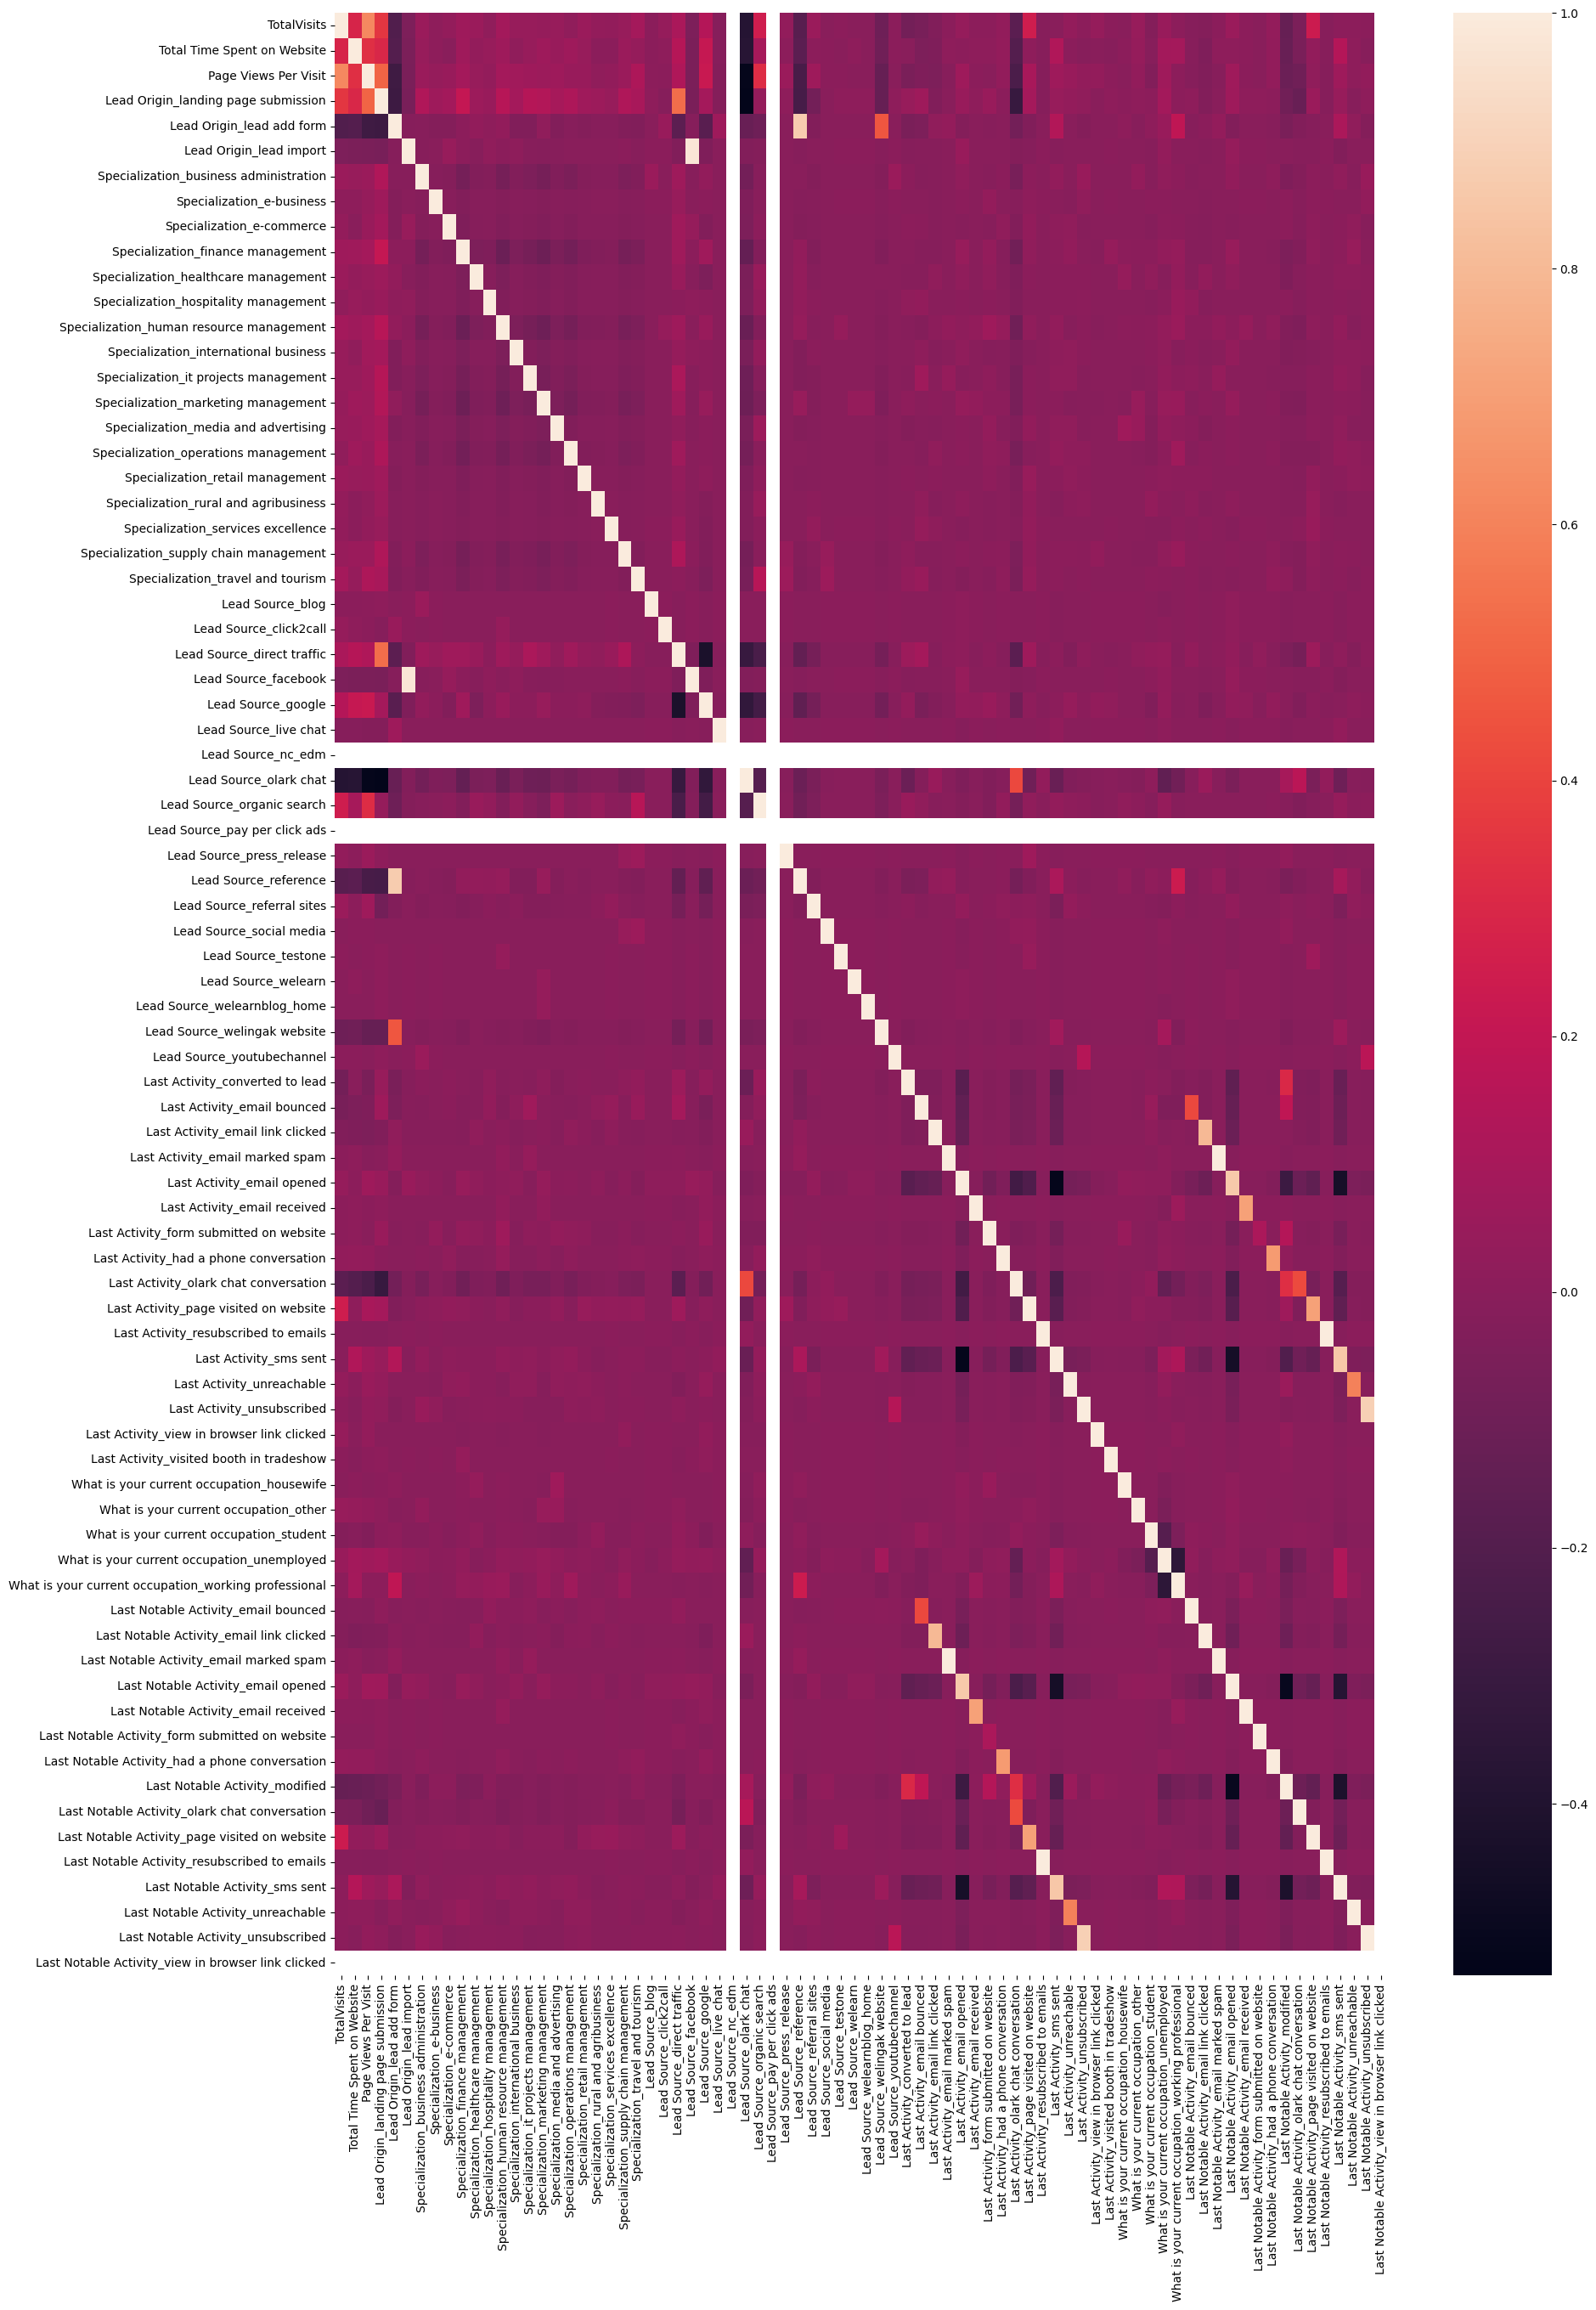

In [168]:
#  checking the correlation amongst varibles


plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

In [147]:
#its really difficult to interpret anything at this stage

#### BUILDING A MODEL

In [148]:
##importing the necessary libraries

In [169]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [170]:
from sklearn.feature_selection import RFE

In [171]:
#  RFE with 15 variables as output

rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [172]:
# Features that have been selected by RFE


list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_landing page submission', False, 25),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 38),
 ('Specialization_business administration', False, 33),
 ('Specialization_e-business', False, 32),
 ('Specialization_e-commerce', False, 24),
 ('Specialization_finance management', False, 30),
 ('Specialization_healthcare management', False, 27),
 ('Specialization_hospitality management', False, 43),
 ('Specialization_human resource management', False, 31),
 ('Specialization_international business', False, 36),
 ('Specialization_it projects management', False, 29),
 ('Specialization_marketing management', False, 21),
 ('Specialization_media and advertising', False, 40),
 ('Specialization_operations management', False, 26),
 ('Specialization_retail management', False, 60),
 ('Specialization_rural and agribusiness', False, 23),
 ('Specialization_serv

In [173]:
# Put all the columns selected by RFE in the variable 'col'


col = X_train.columns[rfe.support_]

In [174]:
# Selecting columns selected by RFE


X_train = X_train[col]

In [175]:
# Importing statsmodels


import statsmodels.api as sm

In [176]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2654.3
Date:                Mon, 15 Jan 2024   Deviance:                       5308.6
Time:                        11:13:55   Pearson chi2:                 6.59e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3926
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4921      0.114    -30.632      0.000      -3.716      -3.269
TotalVisits                                              4.4247      1.467      3.016      0.003       1.549       7.300
Total Time Spent on Website                              4.6634      0.166     28.038      0.000       4.337       4.989
Lead Origin_lead add form                                3.6800      0.225     16.385      0.000       3.240       4.120
Lead Source_olark chat                                   1.6015      0.112     14.344      0.000       1.383       1.820
Lead Source_welingak website                             2.6284      1.036      2.537      0.011       0.597       4.659
Last Activity_email bounced                             -1.8713      0.337     -5.559      0.000      -2.531      -1.212
Last Activity_olark chat conversation                   -1.4071      0.167     -8.405      0.000      -1.735      -1.079
Last Activity_sms sent                                   1.2137      0.074     16.472      0.000       1.069       1.358
What is your current occupation_housewife               25.4295   3.09e+04      0.001      0.999   -6.05e+04    6.06e+04
What is your current occupation_other                    2.2360      0.756      2.959      0.003       0.755       3.717
What is your current occupation_student                  1.3091      0.226      5.798      0.000       0.867       1.752
What is your current occupation_unemployed               1.1793      0.086     13.747      0.000       1.011       1.347
What is your current occupation_working professional     3.7384      0.205     18.224      0.000       3.336       4.141
Last Notable Activity_had a phone conversation          24.0520   2.16e+04      0.001      0.999   -4.23e+04    4.24e+04
Last Notable Activity_unreachable                        1.8612      0.602      3.092      0.002       0.681       3.041
========================================================================================================================
"""

In [177]:
# Importing 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [178]:
# Make a VIF dataframe for all the variables present


vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_unemployed,2.31
1,Total Time Spent on Website,2.07
0,TotalVisits,1.82
2,Lead Origin_lead add form,1.59
7,Last Activity_sms sent,1.55
3,Lead Source_olark chat,1.51
6,Last Activity_olark chat conversation,1.37
12,What is your current occupation_working profes...,1.32
4,Lead Source_welingak website,1.31
10,What is your current occupation_student,1.05


#### Feature elimination

In [260]:
#The VIF values seem fine but the p-values aren't. So starting by removing 'Last Notable Activity had a phone conversation'


In [179]:
X_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

In [180]:
# Refit the model with the modified features

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2662.3
Date:                Mon, 15 Jan 2024   Deviance:                       5324.5
Time:                        11:16:09   Pearson chi2:                 6.59e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3911
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4879      0.114    -30.606      0.000      -3.711      -3.265
TotalVisits                                              4.6014      1.477      3.115      0.002       1.707       7.496
Total Time Spent on Website                              4.6490      0.166     28.026      0.000       4.324       4.974
Lead Origin_lead add form                                3.6740      0.225     16.361      0.000       3.234       4.114
Lead Source_olark chat                                   1.5975      0.112     14.310      0.000       1.379       1.816
Lead Source_welingak website                             2.6282      1.036      2.536      0.011       0.597       4.659
Last Activity_email bounced                             -1.8760      0.336     -5.576      0.000      -2.535      -1.217
Last Activity_olark chat conversation                   -1.4115      0.167     -8.434      0.000      -1.740      -1.083
Last Activity_sms sent                                   1.2055      0.074     16.383      0.000       1.061       1.350
What is your current occupation_housewife               23.4238   1.14e+04      0.002      0.998   -2.22e+04    2.23e+04
What is your current occupation_other                    2.2289      0.755      2.950      0.003       0.748       3.710
What is your current occupation_student                  1.3076      0.226      5.795      0.000       0.865       1.750
What is your current occupation_unemployed               1.1845      0.086     13.821      0.000       1.017       1.352
What is your current occupation_working professional     3.7363      0.205     18.225      0.000       3.334       4.138
Last Notable Activity_unreachable                        1.8518      0.602      3.078      0.002       0.673       3.031
========================================================================================================================
"""

In [181]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_unemployed,2.30
1,Total Time Spent on Website,2.07
0,TotalVisits,1.82
2,Lead Origin_lead add form,1.59
7,Last Activity_sms sent,1.55
3,Lead Source_olark chat,1.51
6,Last Activity_olark chat conversation,1.37
12,What is your current occupation_working profes...,1.32
4,Lead Source_welingak website,1.31
10,What is your current occupation_student,1.05


In [182]:
## Now eliminating "What is your current occupation housewife"

In [183]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [184]:
# Refit the model with updated features

X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2670.9
Date:                Mon, 15 Jan 2024   Deviance:                       5341.7
Time:                        11:16:23   Pearson chi2:                 6.61e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3895
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4579      0.113    -30.555      0.000      -3.680      -3.236
TotalVisits                                              4.5335      1.472      3.080      0.002       1.649       7.418
Total Time Spent on Website                              4.6435      0.166     28.042      0.000       4.319       4.968
Lead Origin_lead add form                                3.6867      0.225     16.419      0.000       3.247       4.127
Lead Source_olark chat                                   1.5866      0.111     14.247      0.000       1.368       1.805
Lead Source_welingak website                             2.6112      1.036      2.520      0.012       0.580       4.642
Last Activity_email bounced                             -1.8831      0.336     -5.600      0.000      -2.542      -1.224
Last Activity_olark chat conversation                   -1.4171      0.167     -8.474      0.000      -1.745      -1.089
Last Activity_sms sent                                   1.1971      0.073     16.298      0.000       1.053       1.341
What is your current occupation_other                    2.2060      0.755      2.920      0.003       0.725       3.686
What is your current occupation_student                  1.2845      0.225      5.697      0.000       0.843       1.726
What is your current occupation_unemployed               1.1625      0.085     13.650      0.000       0.996       1.329
What is your current occupation_working professional     3.7125      0.205     18.134      0.000       3.311       4.114
Last Notable Activity_unreachable                        1.8421      0.601      3.063      0.002       0.663       3.021
========================================================================================================================
"""

In [185]:
# Make a VIF dataframe for all the variables present


vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_unemployed,2.30
1,Total Time Spent on Website,2.06
0,TotalVisits,1.82
2,Lead Origin_lead add form,1.58
7,Last Activity_sms sent,1.55
3,Lead Source_olark chat,1.51
6,Last Activity_olark chat conversation,1.37
11,What is your current occupation_working profes...,1.32
4,Lead Source_welingak website,1.31
9,What is your current occupation_student,1.05


In [186]:
## Now eliminating "WWhat is your current occupation_other"

In [187]:
X_train.drop('What is your current occupation_other', axis = 1, inplace = True)

In [188]:
# Refit the model with modified features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2675.6
Date:                Mon, 15 Jan 2024   Deviance:                       5351.2
Time:                        11:16:33   Pearson chi2:                 6.61e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3886
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4394      0.113    -30.490      0.000      -3.660      -3.218
TotalVisits                                              4.7279      1.483      3.187      0.001       1.820       7.635
Total Time Spent on Website                              4.6530      0.166     28.107      0.000       4.328       4.977
Lead Origin_lead add form                                3.6934      0.225     16.446      0.000       3.253       4.134
Lead Source_olark chat                                   1.5847      0.111     14.225      0.000       1.366       1.803
Lead Source_welingak website                             2.6117      1.036      2.520      0.012       0.581       4.643
Last Activity_email bounced                             -1.8882      0.336     -5.617      0.000      -2.547      -1.229
Last Activity_olark chat conversation                   -1.4128      0.167     -8.456      0.000      -1.740      -1.085
Last Activity_sms sent                                   1.1913      0.073     16.238      0.000       1.047       1.335
What is your current occupation_student                  1.2606      0.225      5.596      0.000       0.819       1.702
What is your current occupation_unemployed               1.1385      0.085     13.472      0.000       0.973       1.304
What is your current occupation_working professional     3.6882      0.204     18.039      0.000       3.287       4.089
Last Notable Activity_unreachable                        1.8333      0.601      3.049      0.002       0.655       3.012
========================================================================================================================
"""

In [189]:
# Make a VIF dataframe for all the variables present


vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_unemployed,2.30
1,Total Time Spent on Website,2.06
0,TotalVisits,1.82
2,Lead Origin_lead add form,1.58
7,Last Activity_sms sent,1.55
3,Lead Source_olark chat,1.51
6,Last Activity_olark chat conversation,1.37
10,What is your current occupation_working profes...,1.32
4,Lead Source_welingak website,1.31
8,What is your current occupation_student,1.05


###### VIF and P values look good now

#### PREDICTION CREATION

In [190]:
# Predicting the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.649527
3604    0.135329
5584    0.164040
7679    0.135329
7563    0.387899
7978    0.758862
7780    0.155930
7863    0.982089
838     0.776544
708     0.146284
dtype: float64

In [191]:
# Reshaping the same into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.64952699, 0.13532885, 0.16403992, 0.13532885, 0.38789903,
       0.75886225, 0.15593025, 0.98208925, 0.77654367, 0.14628394])

In [192]:
# Data frame with given convertion rate and probablity of predicted ones

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.649527
1,0,0.135329
2,0,0.164040
3,0,0.135329
4,0,0.387899


In [193]:
# keeping cut off as 0.5, subtituting the values as 0 or 1

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.649527,1
1,0,0.135329,0
2,0,0.164040,0
3,0,0.135329,0
4,0,0.387899,0


#### MODEL EVALUATION

In [194]:
from sklearn import metrics

In [195]:
# Creating confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3442,  453],
       [ 752, 1704]], dtype=int64)

In [196]:
# Check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.810266099826799

In [197]:
## This gives us 81% accuracy

In [198]:
# Substituting the value of true positive

TP = confusion[1,1]
# Substituting the value of true negatives

TN = confusion[0,0]
# Substituting the value of false positives

FP = confusion[0,1] 
# Substituting the value of false negatives

FN = confusion[1,0]

In [199]:
# Calculating the sensitivity

TP/(TP+FN)

0.6938110749185668

In [200]:
# Calculating the specificity

TN/(TN+FP)

0.8836970474967908

In [201]:
## with present cut off set as 0.5 we have sensitivity at 69% and specificity at 88%

#### ROC CURVE

In [202]:
# getting the optimum cut off

In [203]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [204]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

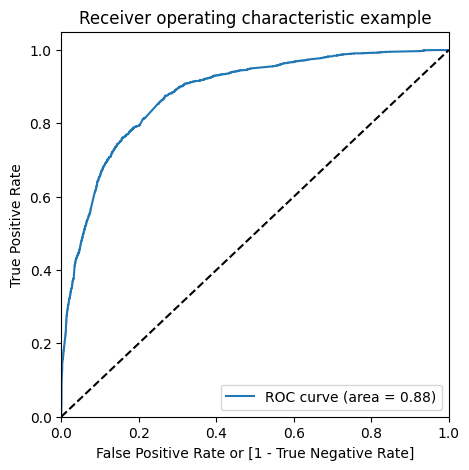

In [206]:
# Calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [207]:
# we can see that the are under the curve is 0.88

In [208]:
# Creating columns with various probability cutoff


numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.649527,1,1,1,1,1,1,1,1,0,0,0
1,0,0.135329,0,1,1,0,0,0,0,0,0,0,0
2,0,0.164040,0,1,1,0,0,0,0,0,0,0,0
3,0,0.135329,0,1,1,0,0,0,0,0,0,0,0
4,0,0.387899,0,1,1,1,1,0,0,0,0,0,0


In [209]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoff

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity


from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.569359,0.982492,0.308858
0.2,0.2,0.755314,0.915309,0.654429
0.3,0.3,0.786648,0.870928,0.733504
0.4,0.4,0.810109,0.761808,0.840565
0.5,0.5,0.810266,0.693811,0.883697
0.6,0.6,0.798929,0.622964,0.909884
0.7,0.7,0.772004,0.502036,0.942234
0.8,0.8,0.749961,0.407166,0.966110
0.9,0.9,0.703826,0.253664,0.987677


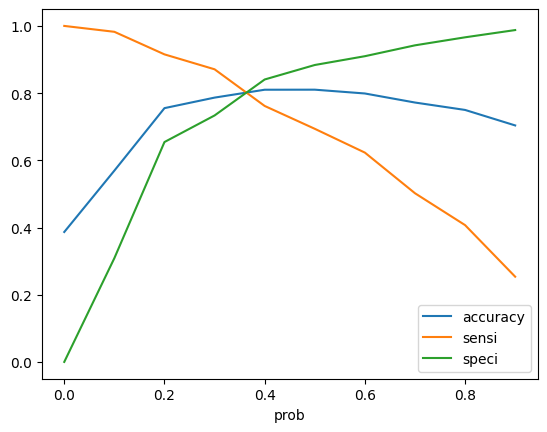

In [210]:
# Plotting the same


cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [211]:
## The optimal cutoff appears to be around 0.35

In [212]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.649527,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.135329,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.164040,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.135329,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.387899,0,1,1,1,1,0,0,0,0,0,0,1


In [213]:
# Check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8001889466225791

In [214]:
# Creating confusion matrix 


confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3135,  760],
       [ 509, 1947]], dtype=int64)

In [215]:
# Substituting the value of true positive

TP = confusion2[1,1]

# Substituting the value of true negatives


TN = confusion2[0,0]

# Substituting the value of false positives

FP = confusion2[0,1] 

# Substituting the value of false negatives

FN = confusion2[1,0]

In [216]:
# Calculating the sensitivity
TP/(TP+FN)

0.7927524429967426

In [217]:
# Calculating the specificity
TN/(TN+FP)


0.8048780487804879

In [218]:
## with present cut off set as 0.35 we have sensitivity at 79% and specificity at 80%

#### PREDICTION ON TEST SET

In [219]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [220]:
# Substituting all the columns in the final train model
col = X_train.columns

In [221]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_olark chat,Lead Source_welingak website,Last Activity_email bounced,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_unreachable
8308,1.0,0.035461,0.416813,0,0,0,0,0,0,0,1,0,0
7212,1.0,0.028369,0.001320,0,0,0,0,0,1,0,0,1,0
2085,1.0,0.000000,0.000000,1,0,1,0,0,0,0,1,0,0
4048,1.0,0.028369,0.617077,0,0,0,0,0,1,0,1,0,0
4790,1.0,0.028369,0.005282,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0.000000,0,1,0,0,1,0,0,1,0,0
8179,1.0,0.170213,0.148768,0,0,0,0,0,1,0,0,0,0
6236,1.0,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0
5240,1.0,0.078014,0.458627,0,0,0,0,0,1,0,1,0,0


In [222]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.451705
1,1,0.829251
2,1,0.982089
3,1,0.869411
4,0,0.105066


In [223]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.451705,1
1,1,0.829251,1
2,1,0.982089,1
3,1,0.869411,1
4,0,0.105066,0
...,...,...,...
2718,1,0.106317,0
2719,0,0.320571,0
2720,0,0.135329,0
2721,1,0.801105,1


In [224]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8013220712449505

In [225]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1392,  352],
       [ 189,  790]], dtype=int64)

In [226]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [227]:
# Calculating the sensitivity
TP/(TP+FN)

0.8069458631256384

In [228]:
# Calculating the specificity
TN/(TN+FP)

0.7981651376146789

In [229]:
## With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.

#### PRECISION - RECALL

In [230]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3442,  453],
       [ 752, 1704]], dtype=int64)

In [231]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7899860917941586

In [232]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6938110749185668

In [314]:
## With the current cut off as 0.35 we have Precision around 79% and Recall around 69%

#### PRECISION AND RECALL TRADEOFF

In [233]:
from sklearn.metrics import precision_recall_curve

In [234]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [235]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

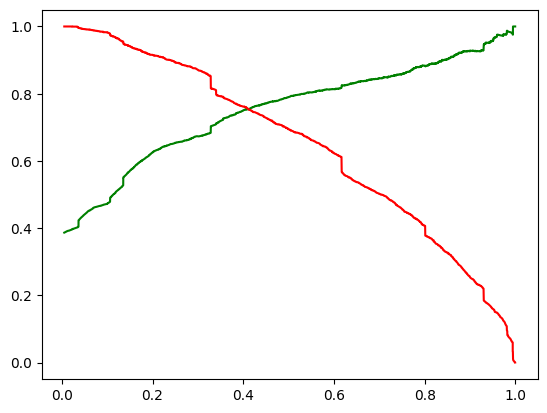

In [236]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [237]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.649527,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.135329,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.164040,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.135329,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.387899,0,1,1,1,1,0,0,0,0,0,0,0


In [238]:
# Accuracy


metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.809951188789167

In [239]:
# Creating confusion matrix


confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3289,  606],
       [ 601, 1855]], dtype=int64)

In [240]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [241]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.753758634701341

In [242]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7552931596091205

In [243]:
##. With the current cut off as 0.41 we have Precision and Recall are around 75%

#### PREDICTION ON TEST SET

In [244]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.451705
1,1,0.829251
2,1,0.982089
3,1,0.869411
4,0,0.105066


In [245]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.451705,1
1,1,0.829251,1
2,1,0.982089,1
3,1,0.869411,1
4,0,0.105066,0
...,...,...,...
2718,1,0.106317,0
2719,0,0.320571,0
2720,0,0.135329,0
2721,1,0.801105,1


In [246]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8138082996694822

In [247]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1470,  274],
       [ 233,  746]], dtype=int64)

In [248]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [249]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7313725490196078

In [250]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7620020429009193

In [334]:
## With the  cut off as 0.41 we have Precision around 73% and Recall around 76%